In [1]:
import crowdmag as cm
import geomag as gm
import correlation as cor
from IPython.display import Javascript, display, clear_output

## Required dependencies

>pandas https://pandas.pydata.org conda install pandas<br>
>lmfit https://lmfit.github.io/lmfit-py/ conda install lmfit<br>
>ruptures https://centre-borelli.github.io/ruptures-docs/ python -m pip install ruptures

# CrowdMag Data

1. Importing CrowdMag data from .csv files. Comment (`#`) out the files not used.
2. Change the fieldtype to whichever component you are trying to plot.
>fieldtype = 'F'  - total magnetic field <br>
>fieldtype = 'H'  - horizontal component of field <br>
>fieldtype = 'X'  - x-component of magnetic field <br>
>fieldtype = 'Y'  - y-component of magnetic field <br>
>fieldtype = 'Z'  - z-component of magnetic field <br>
3. Change the observatory code. For example, 'BRW' stands for Barrow Observatory. 
4. Using the start and the end time in the .csv file, the program downloads the relevant GeoMag data. If the files are already downloaded, type `download = False` to reduce runtime. Otherwise, leaving `download = True` is not a problem, it would just update the files that were already downloaded. It doesn't matter which fieldtype you selected above, it will download ALL components of the magnetic field for that timeframe.

In [2]:
# Path
pathCM = 'data/crowdmag/'

# Filename - Crowdmag
filenameCM = 'crowdmag_april 11 2022_iPhone12,1_2022-04-12 023420.csv'
#filenameCM = 'crowdmag_Boulder 3_13_22 - 3_14_22 11 pm to 7 am_iPhone14,4_2022-03-24 17 10 58.csv'
#filenameCM = 'crowdmag_Outside of Downtown Anchorage_iPhone14,4_2022-03-24 17 11 28.csv'
#filenameCM = 'crowdmag_Walk around Thunderbird, AK_iPhone14,4_2022-03-24 17 11 18.csv'
#filenameCM = 'crowdmag_3-28-22_iPhone12,1_2022-03-28 150111.csv'
#filenameCM = 'crowdmag_3-18-22_iPhone12,1_2022-03-18 134612.csv'
#filenameCM = 'crowdmag_March 15 2022_iPhone12,1_2022-03-15 231641.csv'
#### filenameCM = 'crowdmag_March 14 2022_iPhone12,1_2022-03-14 135556.csv'     # Good one!
#filenameCM = 'crowdmag_March 9 2022_iPhone12,1_2022-03-09 164809.csv'
#filenameCM = 'crowdmag_2-26-22_iPhone12,1_2022-02-15 170458.csv'
#filenameCM = 'crowdmag_2-20-22_iPhone12,1_2022-02-09 234741.csv'
#filenameCM = 'crowdmag_1-2-22_iPhone12,1_2022-01-01 190715.csv'       # Year for December is wrong (2022)
#filenameCM = 'crowdmag_bishop 1_iPhone12,1_2022-12-31 041124.csv'     # Year for December is wrong (2022), also wrong date format: 'MM/D/YYYY HH:MM' 
#filenameCM = 'crowdmag_office 2_iPhone12,1_2021-12-15 203221.csv'
#filenameCM = 'crowdmag_office 3_iPhone12,1_2021-12-16 144130.csv'
#filenameCM = 'crowdmag_office 5_iPhone12,1_2021-12-19 025911.csv'
#filenameCM = 'crowdmag_office 6_iPhone12,1_2021-12-19 142234.csv'
#filenameCM = 'crowdmag_office 7_iPhone12,1_2021-12-21 162448.csv'
#filenameCM = 'crowdmag_Prudhoe Test1_iPhone12,1_2021-12-07 162125.csv'
#filenameCM = 'crowdmag_shop 2022_iPhone12,1_2022-02-01 030406.csv'
#filenameCM = 'crowdmag_third floor closet_iPhone12,1_2021-12-10 144321.csv'
#filenameCM = 'crowdmag_third floor shelf_iPhone12,1_2021-12-09 225813.csv'    # Wrong date format: 'MM/D/YYYY HH:MM'
#filenameCM = 'crowdmag_third floor_iPhone12,1_2021-12-08 150106.csv'          # Wrong date format: 'MM/D/YYYY HH:MM'

# Field type
fieldtype='F'

# Observatory code
observatory = 'DED'    # Deadhorse Observatory
#observatory = 'BRW'   # Barrow Observatory
#obslist = ['BRW','DED']

# Download Geomag data or not
download = True        # Can either be True or False
                       # download = False saves time if the file was previously downloaded

# Trim dataset (CrowdMag data)
startCM = 3 #924 #4100
endCM = -1

# Changing points for CrowdMag data
bkps = 6

# Rolling average window size
window_size = 30

In [3]:
# Default filename
def_filenameCM = ['crowdmag_March 14 2022_iPhone12,1_2022-03-14 135556.csv']         

# Add selected filename to the list
def on_change(change):                                                     
    if change['type'] == 'change' and change['name'] == 'value':
        def_filenameCM.append(change['new'])
        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
cm.dropdownmenu.observe(on_change)
display(cm.CrowdMagFileList)

Box(children=(Box(children=(Label(value='CrowdMag file: '), Dropdown(index=9, options=('crowdmag_1-2-22_iPhone…

In [4]:
# Print selected filename
filenameCM = def_filenameCM[-1] 
print(filenameCM)

crowdmag_March 14 2022_iPhone12,1_2022-03-14 135556.csv


In [5]:
# Finding the row for the given date for easier trimming
trimindex = cm.FindDate(pathCM + filenameCM,startCM,endCM,'2022-03-14')

The date 2022-03-14 starts on row 5025.


In [6]:
# Trim more data
#startCM = 3791
#endCM = 5025

## Plot CrowdMag data

1. Change the `start` and `end` variables to zoom into the plot. The numbers represent rows in the .csv file.

### Raw

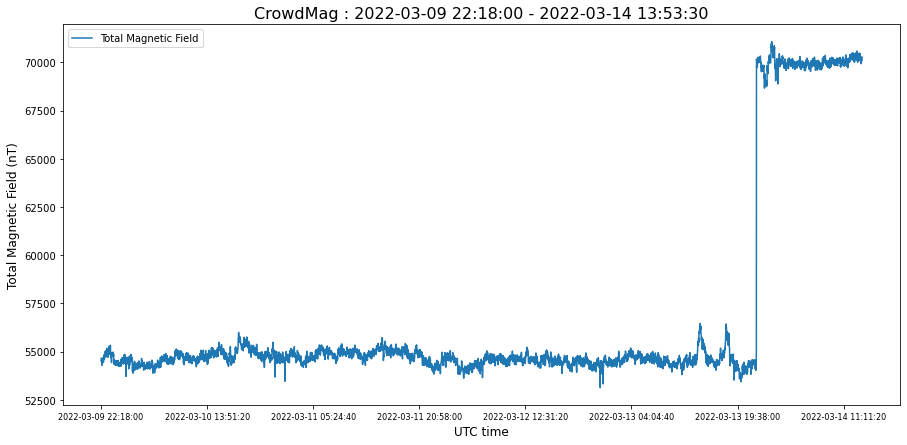

In [7]:
cm.PlotBCrowdMag(pathCM + filenameCM,
                 fieldtype = fieldtype,
                 startCM = startCM,endCM = endCM)

### DC shift

1. Change point detection: 
> Source: <br>
Time Traveling with Data Science: Focusing on Time Series Analysis (Part 2)
https://www.iese.fraunhofer.de/blog/change-point-detection/
>(FYI: Part 1 of this blog series is also very useful: https://www.iese.fraunhofer.de/blog/time-series-analysis/)

### Rolling Average

Applied: rolling average and DC shift

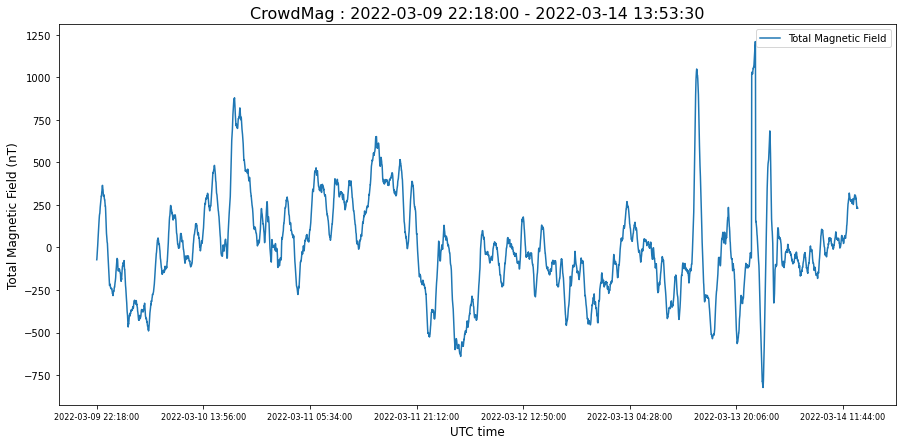

In [8]:
cm.PlotBCrowdMag(pathCM + filenameCM,
                 fieldtype = fieldtype,
                 startCM = startCM,endCM = endCM,
                 rollingave = True, 
                 window_size = window_size,
                 dc_shift = True,
                 bkps = bkps,
                 filter_signal = 'raw')

### Filtering

Here I'm using the combination of "digital filter forward and backward to a signal" and "FFT bandpass filter". See filtertest.ipynb Notebook for more.

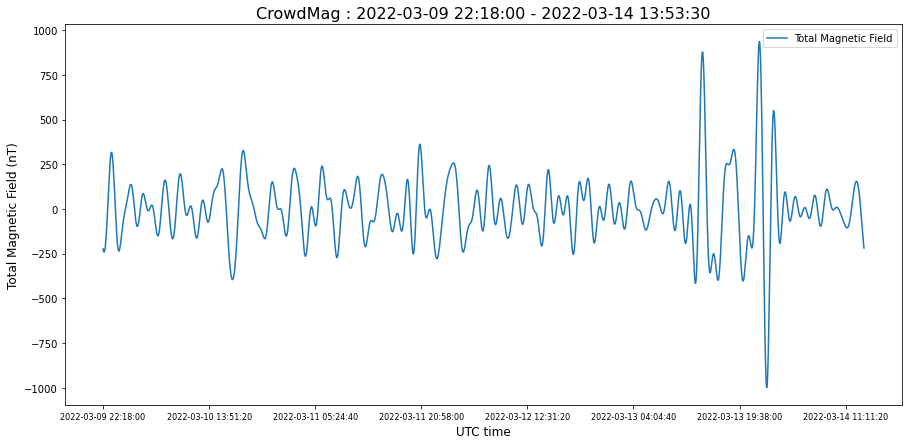

In [9]:
cm.PlotBCrowdMag(pathCM + filenameCM,
                 fieldtype = fieldtype,
                 startCM = startCM,endCM = endCM,
                 rollingave = False, 
                 window_size = window_size,
                 dc_shift = True,
                 bkps = bkps,
                 filter_signal = 'combo')

#### ... More testing in: magneto/filtertest.ipynb
#### ... Filter parameters in: magneto/filterdata.py

# GeoMag data

1. Download the GeoMag data using the CrowdMag .csv file. The program takes the start and end times, the observatory code, the component of the magnetic field and downloads a .csv file into the folder \data\geomag.
2. Note that this function is able to download specified components of the magnetic field.
3. The function is incorporated in the plotting function below.

In [10]:
gm.DownloadGeoMag(pathCM + filenameCM,
                  component = 'X',
                  observatory = observatory,
                  startCM = startCM, endCM = endCM)

Download URL: https://geomag.usgs.gov/ws/data/?elements=X&endtime=2022-03-14T13:53:30.000Z&format=iaga2002&id=DED&sampling_period=60&starttime=2022-03-09T22:18:00.000Z&type=variation
Downloaded file successfully. Observatory: DED, B-field component: X, Start date: 2022-03-09, End date: 2022-03-14.
Geomag data file location: 'C:\Users\judit\OneDrive\Documents\GitHub\NOAA_CrowdMag\magneto\data\geomag'.


2. The format of the GeoMag data filename: 
> geomag, observatory code, component of magnetic field, start date, end date <br>
> geomag{OBSCODE}{COMPONENT}_YYYY-MM-DD_YYYY-MM-DD.csv <br>
> For example: geomagBRWH_2021-12-17_2021-12-19.csv <br>

## Plot GeoMag data

1. Change the `start` and `end` variables to zoom into the plot. The numbers represent rows in the .csv file.
2. The observatory code, fieldtype, download boolean is defined in the first cells of the notebook. 
3. The filename should be the CrowdMag .csv because it uses the times to download the GeoMag data.

### Raw

Download URL: https://geomag.usgs.gov/ws/data/?elements=X&endtime=2022-03-14T13:53:30.000Z&format=iaga2002&id=DED&sampling_period=60&starttime=2022-03-09T22:18:00.000Z&type=variation
Downloaded file successfully. Observatory: DED, B-field component: X, Start date: 2022-03-09, End date: 2022-03-14.
Geomag data file location: 'C:\Users\judit\OneDrive\Documents\GitHub\NOAA_CrowdMag\magneto\data\geomag'.
Download URL: https://geomag.usgs.gov/ws/data/?elements=Y&endtime=2022-03-14T13:53:30.000Z&format=iaga2002&id=DED&sampling_period=60&starttime=2022-03-09T22:18:00.000Z&type=variation
Downloaded file successfully. Observatory: DED, B-field component: Y, Start date: 2022-03-09, End date: 2022-03-14.
Geomag data file location: 'C:\Users\judit\OneDrive\Documents\GitHub\NOAA_CrowdMag\magneto\data\geomag'.
Download URL: https://geomag.usgs.gov/ws/data/?elements=Z&endtime=2022-03-14T13:53:30.000Z&format=iaga2002&id=DED&sampling_period=60&starttime=2022-03-09T22:18:00.000Z&type=variation
Downloade

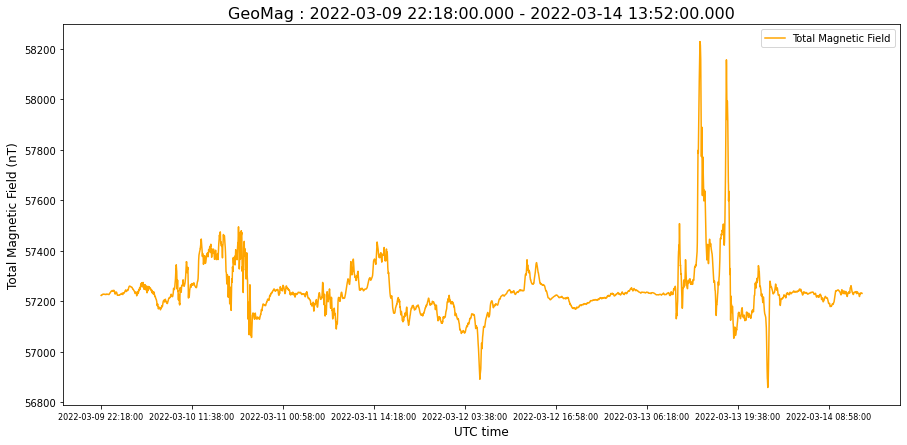

In [11]:
gm.PlotBGeoMag(pathCM + filenameCM,
               observatory = observatory,
               fieldtype = fieldtype,
               startCM = startCM, endCM = endCM, startGM = 0, endGM = -1,
               download = download,
               dc_shift = False,
               filter_signal = 'raw')

### DC shifted

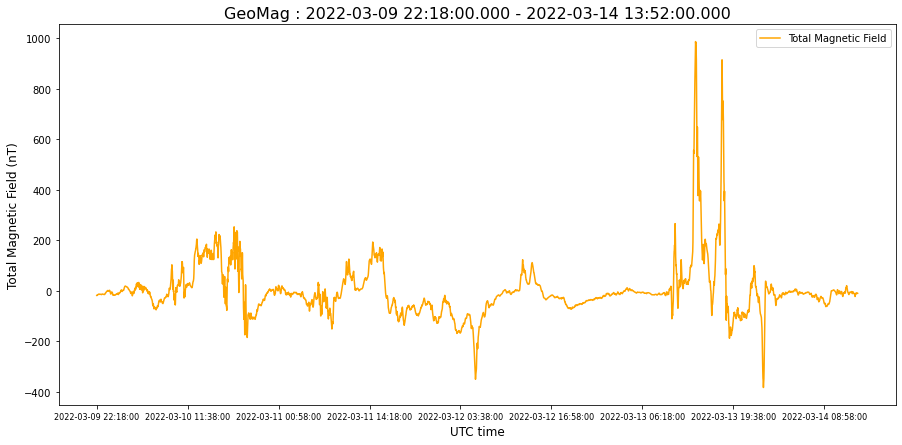

In [12]:
gm.PlotBGeoMag(pathCM + filenameCM,
               observatory = observatory,
               fieldtype = fieldtype,
               startCM = startCM, endCM = endCM, startGM = 0, endGM = -1,
               download = False,
               dc_shift = True,
               filter_signal = 'raw')

### Filtering

Here I'm using the combination of "digital filter forward and backward to a signal" and "FFT bandpass filter". See filtertest.ipynb Notebook for more.

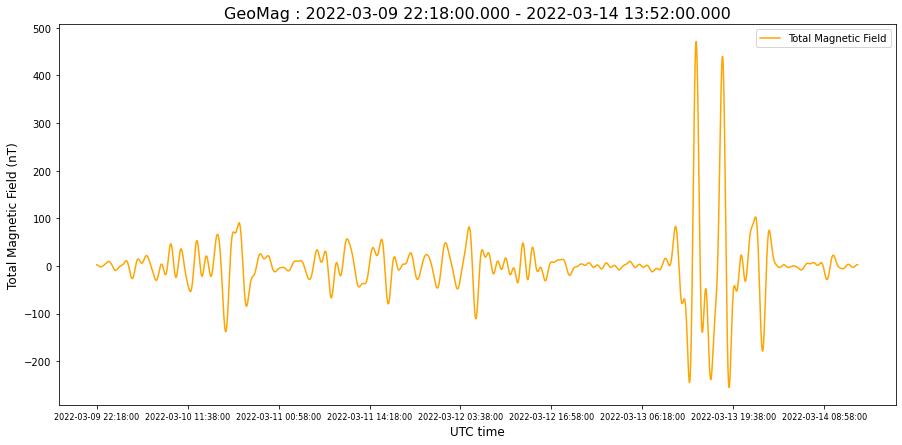

In [13]:
gm.PlotBGeoMag(pathCM + filenameCM,
               observatory = observatory,
               fieldtype = fieldtype,
               startCM = startCM, endCM = endCM, startGM = 0, endGM = -1,
               download = False,
               dc_shift = True,
               filter_signal = 'combo')

# CrowdMag vs GeoMag

## Overlay two data sets - without time shift

1. Overlaying the CrowdMag and the GeoMag data.
2. The CrowdMag data is DC shifted to zero. 

### Raw

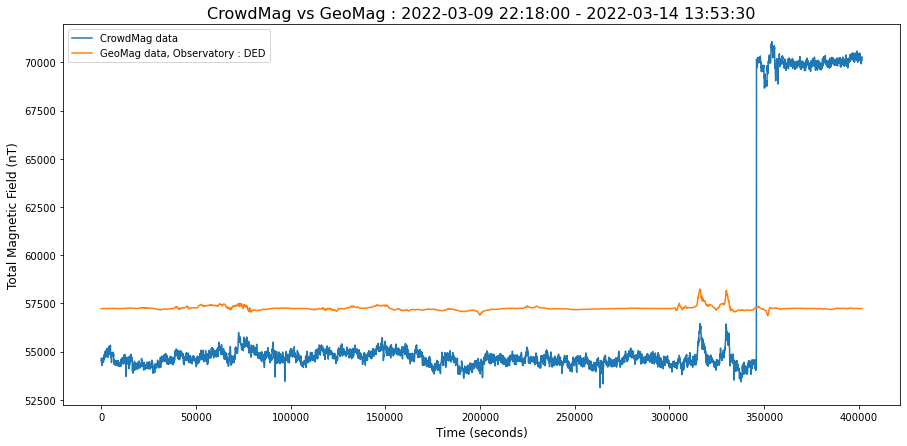

In [14]:
cor.PlotOverlay2Data(pathCM + filenameCM,
                     observatory = observatory,
                     fieldtype = fieldtype,
                     startCM = startCM, endCM = endCM, startGM = 0, endGM = -1,
                     download = False,
                     timeshift = 0,
                     rollingave = False, 
                     window_size = window_size,
                     dc_shift = False,
                     filter_signal = 'raw')

### Rolling Average, DC shifted

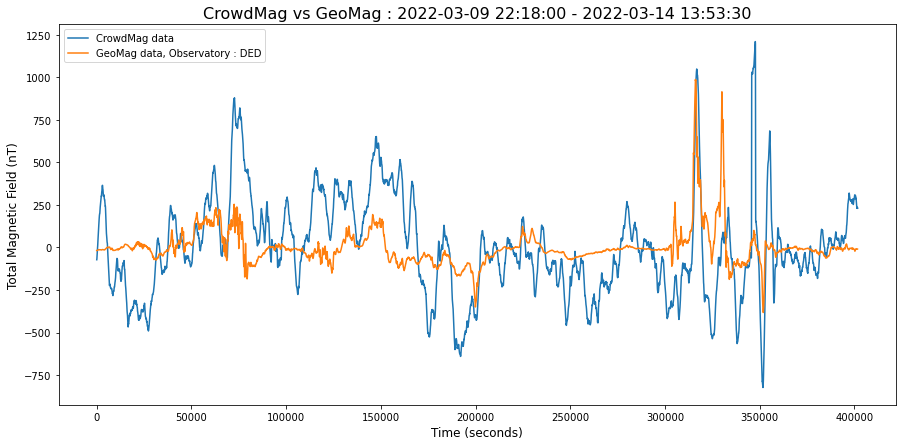

In [15]:
cor.PlotOverlay2Data(pathCM + filenameCM,
                     observatory = observatory,
                     fieldtype = fieldtype,
                     startCM = startCM, endCM = endCM, startGM = 0, endGM = -1,
                     download = False,
                     timeshift = 0,
                     rollingave = True, 
                     window_size = window_size,
                     dc_shift = True,
                     bkps = bkps,
                     filter_signal = 'raw')

### Filtering

Here I'm using the combination of "digital filter forward and backward to a signal" and "FFT bandpass filter". See filtertest.ipynb Notebook for more.

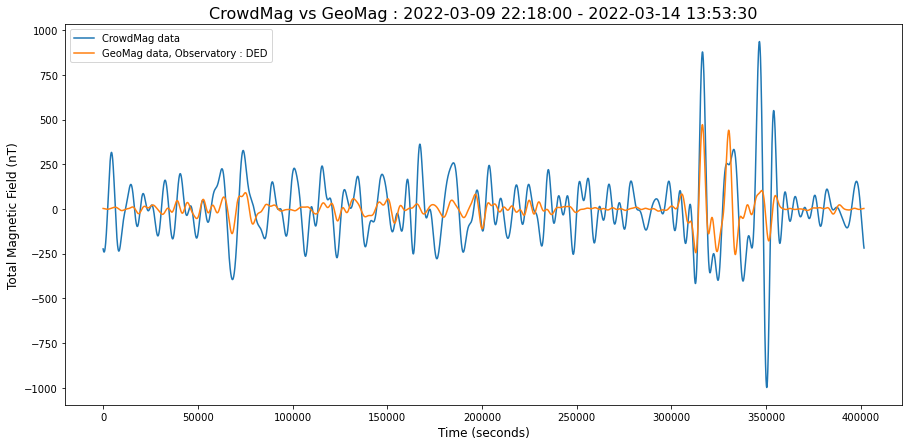

In [16]:
cor.PlotOverlay2Data(pathCM + filenameCM,
                     observatory = observatory,
                     fieldtype = fieldtype,
                     startCM = startCM, endCM = endCM, startGM = 0, endGM = -1,
                     download = False,
                     timeshift = 0,
                     rollingave = False, 
                     window_size = window_size,
                     dc_shift = True,
                     bkps = bkps,
                     filter_signal = 'combo')

## Scatter Plot and Fitting - without time shift

1. In order to create a scatter plot with the two data sets, the number of data points need to be the same.
2. A 1-D interpolating spline is created for both the CrowdMag and the GeoMag data points, using a scipy library: 
> https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.InterpolatedUnivariateSpline.html
3. Using the now continuous function, new data points is defined for both data sets. 
4. A linear fit ( ax + b ) is created to fit the data points.
5. The correlation coefficient, and the reduced chi-squared is calculated. 

### DC shifted, filtered

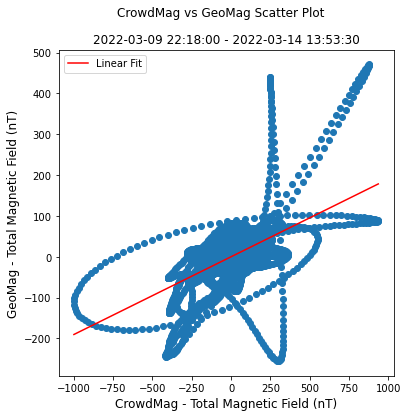

Correlation coefficient of the two datasets is 0.5472.
Slope = 0.19060376693845038
Intercept = 0.0005913225474978671
Chi-squared = 21660.538226862438
Reduced chi-squared = 3.774928237515238
Pandas computed Pearson r: 0.547
Scipy computed Pearson r: 0.547 and p-value: 0


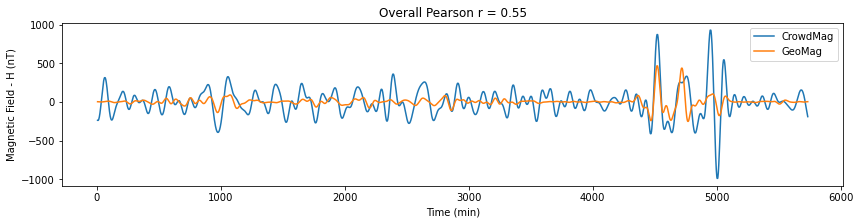

In [17]:
cor.ScatterPlot(pathCM + filenameCM,
                observatory = observatory,
                fieldtype = fieldtype,
                startCM = startCM, endCM = endCM, startGM = 0, endGM = -1,
                download = False,
                timeshift = 0,
                rollingave = False, 
                window_size = window_size,
                dc_shift = True,
                bkps = bkps,
                filter_signal = 'combo')

## Rolling window time-lagged time correlation

1. A rolling window time-lagged time correlation is calculated, using this article as a reference: 
> https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9
2. The function loops through small chunks of the data set where the size is defined by the `windowsize`, and the step size (less step size = more detail) is defined by the `step`.
3. The time-lag is calculated looping through the range from `-n` to `n+1` for each window epoch. It shifts the rows back and forth and calculates the correlation for each case.
4. Each line in the `Epochs` represents the window for the calculation.

Max correlation value = 0.7778119713008841
Column of max correlation value, or time shift in minutes = 11


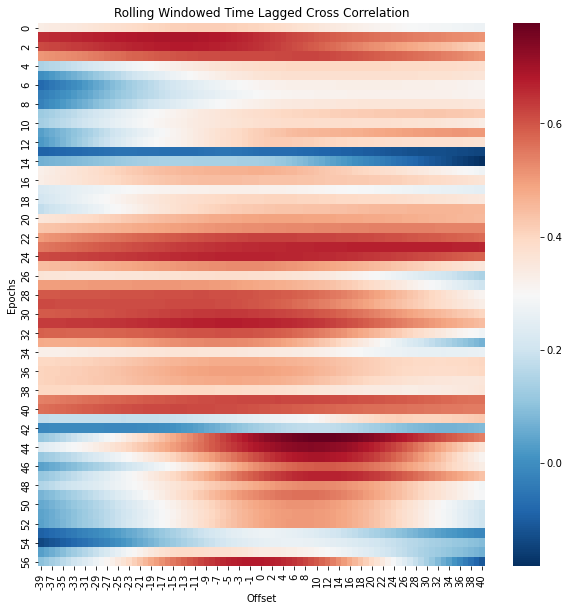

In [18]:
cor.RWTLCC(pathCM + filenameCM,
           observatory = observatory,
           fieldtype = fieldtype,
           startCM = startCM, endCM = endCM, startGM = 0, endGM = -1,
           download = False,
           n = 40,
           w = 1000,
           step = 100,
           rollingave = True,
           window_size = window_size,
           dc_shift = True,
           bkps = bkps,
           filter_signal = 'raw') 

## Time shifted data sets

Not sure if we need this... Let's timeshift by 2 min for now to see if anything changes, using rolling averages instead of filtering.

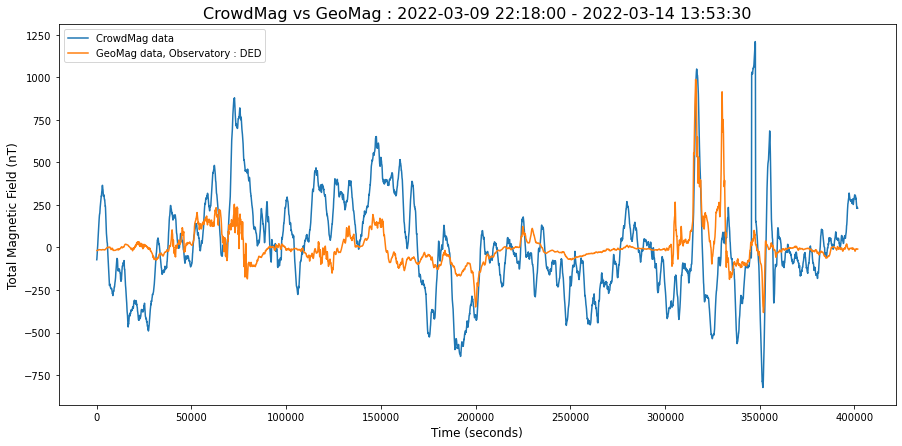

In [19]:
cor.PlotOverlay2Data(pathCM + filenameCM,
                     observatory = observatory,
                     fieldtype = fieldtype,
                     startCM = startCM, endCM = endCM, startGM = 0, endGM = -1,
                     download = False,
                     timeshift = 2,
                     rollingave = True, 
                     window_size = window_size,
                     dc_shift = True,
                     bkps = bkps,
                     filter_signal = 'raw')

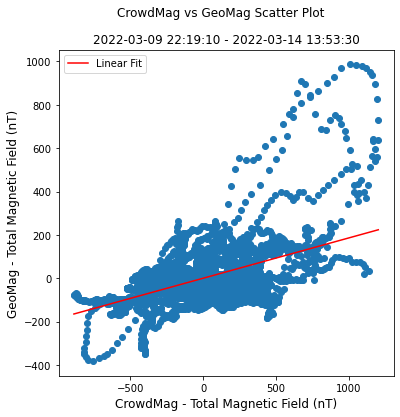

Correlation coefficient of the two datasets is 0.5134.
Slope = 0.18603661824922083
Intercept = 0.08142458114729333
Chi-squared = 12028.700045478812
Reduced chi-squared = 2.107340582599652
Pandas computed Pearson r: 0.513
Scipy computed Pearson r: 0.513 and p-value: 0


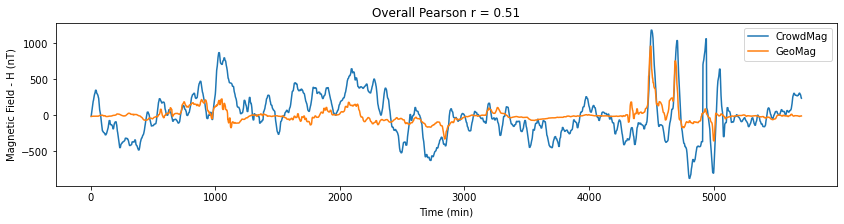

In [20]:
cor.ScatterPlot(pathCM + filenameCM,
                observatory = observatory,
                fieldtype = fieldtype,
                startCM = startCM, endCM = endCM, startGM = 0, endGM = -1,
                download = False,
                timeshift = 2,
                rollingave = True, 
                window_size = window_size,
                dc_shift = True,
                bkps = 3,
                filter_signal = 'raw')